In [1]:
path=  'C:/Users/felipe/Documents/Brain/'
import sys
sys.path.append(path) 

In [2]:
path_=  'C:/Users/felipe/Documents/Brain/Models/'
import sys
sys.path.append(path_) 

In [3]:
from svr_regressor import SVRRegressor
from Plotter import Plotter


c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd
import numpy as np
import pickle

file_name = 'dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"

df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 40
df_filtrado = df[df['Age'] > 40].reset_index(drop=True)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

svr_model = SVRRegressor()
svr_model.set_data(X,y, preprocess=True)

svr_model = SVRRegressor()
svr_model.set_data(X,y)
Plotters = Plotter()

In [ ]:
opt_svr, best_params_svr = svr_model.search_best_model(n_iter_=100)


In [11]:
with open(f'{path}Opt_Model/opt_SVR_model_40A.pickle', 'wb') as file:
        pickle.dump(opt_svr, file)

In [12]:
errores = opt_svr.cv_results_['mean_test_score'][:100]

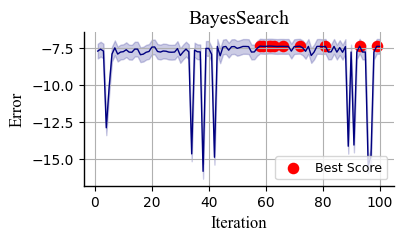

Top 1: Iteration 58, Score -7.360993540378305
Top 2: Iteration 62, Score -7.361186458951314
Top 3: Iteration 61, Score -7.361355808011963
Top 4: Iteration 93, Score -7.365991598655602
Top 5: Iteration 72, Score -7.36868819370518
Top 6: Iteration 63, Score -7.375637092416073
Top 7: Iteration 59, Score -7.3758247974352
Top 8: Iteration 81, Score -7.37653593164597
Top 9: Iteration 99, Score -7.376636753435792
Top 10: Iteration 66, Score -7.376925290920712


In [13]:
Plotters.plot_iteration(y=errores, title='BayesSearch', xlabel='Iteration', ylabel='Error', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2)

In [22]:
best_params_svr = svr_model.best_hyper(opt_model=opt_svr, num_max=100)

In [23]:
best_params_svr

[{'C': 0.03370762932696739,
  'epsilon': 1.0,
  'gamma': 0.36351076805799964,
  'kernel': 'poly'},
 {'C': 0.032459888594978906,
  'epsilon': 1.0,
  'gamma': 0.3670988853642943,
  'kernel': 'poly'},
 {'C': 0.031156285317916213,
  'epsilon': 1.0,
  'gamma': 0.371401252490724,
  'kernel': 'poly'},
 {'C': 0.027240264824655126,
  'epsilon': 0.9334711581233601,
  'gamma': 0.38586331427280496,
  'kernel': 'poly'},
 {'C': 0.028059690473032948,
  'epsilon': 0.001,
  'gamma': 0.3774728915394931,
  'kernel': 'poly'},
 {'C': 0.2718580944100463,
  'epsilon': 1.0,
  'gamma': 0.1613244713391045,
  'kernel': 'poly'},
 {'C': 0.2575693559817346,
  'epsilon': 1.0,
  'gamma': 0.1958632104402573,
  'kernel': 'poly'},
 {'C': 0.18998958792389442,
  'epsilon': 0.0016487188064163538,
  'gamma': 0.1548307749096653,
  'kernel': 'poly'},
 {'C': 100.0, 'epsilon': 1.0, 'gamma': 0.022193041768661576, 'kernel': 'poly'},
 {'C': 0.01982165622908607,
  'epsilon': 1.0,
  'gamma': 0.37730370348037723,
  'kernel': 'poly'}]

In [16]:
results, best_model_results, best_model, residual_model = svr_model.trainer_2(params_=best_params_svr[0])

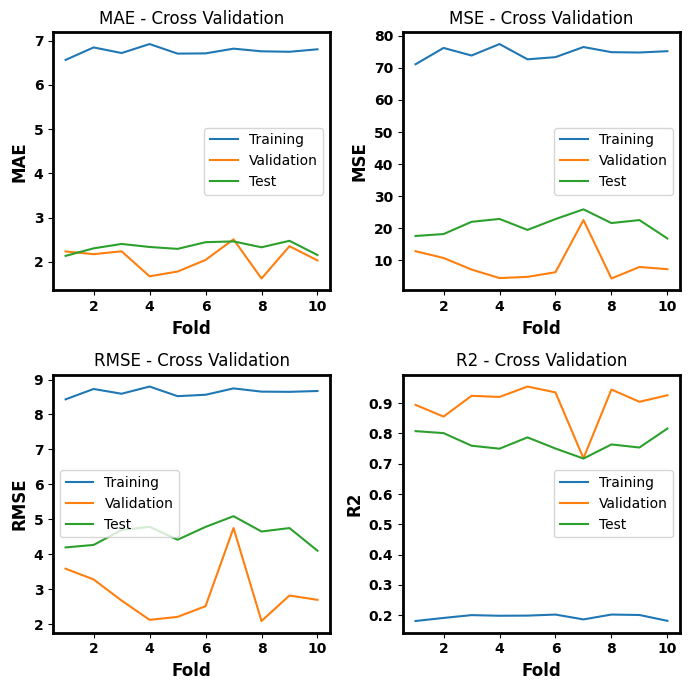

In [17]:
Plotters.plot_metricas_evaluacion(results)

In [18]:
y_pred=svr_model.predicter_corrected_2(X_test= svr_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     633.9
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.57e-57
Time:                        23:13:04   Log-Likelihood:                -478.19
No. Observations:                 162   AIC:                             960.4
Df Residuals:                     160   BIC:                             966.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1025      2.502      0.840      0.4

C:\Users/felipe/Documents/Brain/Models\Plotter.py:213: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


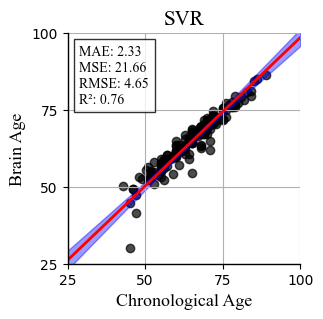

Error medio absoluto: 2.3317896579645114
Error cuadrático medio: 21.6618611171418
Raíz del error cuadrático medio: 4.654230453806709
Coeficiente de determinación (R²): 0.7636269087257687


In [19]:
Plotters.plot_regresion(y=y_pred,x= svr_model.y_test, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=25,y_min_limit=25,x_max_limit=100,y_max_limit=100,color='Black', title='SVR',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

# Diagnosis

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

file_name = 'dataframe_alpha.xlsx'
file_path_CN = f"{path}{file_name}"
file_path_AD = f'{path}df_AD_filtrado.xlsx'
file_path_FTD = f'{path}df_FTD_filtrado.xlsx'
file_path_MCI = f'{path}df_MCI_filtrado.xlsx'
file_path_PD = f'{path}df_PD_filtrado.xlsx'

df_CN = pd.read_excel(file_path_CN)
df_CN_filtrado = df_CN[df_CN['Age'] > 40].reset_index(drop=True)

df_AD_filtrado = pd.read_excel(file_path_AD)
df_FTD_filtrado=pd.read_excel(file_path_FTD)
df_MCI_filtrado=pd.read_excel(file_path_MCI)
df_PD_filtrado=pd.read_excel(file_path_PD)

X_CN = df_CN_filtrado.drop(columns=["Unnamed: 0", "Age"])
X_AD = df_AD_filtrado.drop(columns=["Unnamed: 0", "Age", "Diagnosis"])
X_FTD = df_FTD_filtrado.drop(columns=["Unnamed: 0", "Age", "Diagnosis"])
X_MCI = df_MCI_filtrado.drop(columns=["Unnamed: 0", "Age", "Diagnosis"])
X_PD = df_PD_filtrado.drop(columns=["Unnamed: 0", "Age", "Diagnosis"])

# Combina X_CN y X_AD
X_combined = pd.concat([X_CN, X_AD, X_FTD, X_MCI, X_PD], axis=0).reset_index(drop=True)

# Inicializa y ajusta el MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_combined)

# Aplica la transformación a X_CN y X_AD
X_CN_scaled = scaler.transform(X_CN)
X_AD_scaled = scaler.transform(X_AD)
X_FTD_scaled = scaler.transform(X_FTD)
X_MCI_scaled = scaler.transform(X_MCI)
X_PD_scaled = scaler.transform(X_PD)

# Opcional: convierte los resultados escalados de nuevo a DataFrames
X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)
X_AD_scaled = pd.DataFrame(X_AD_scaled, columns=X_AD.columns)
X_FTD_scaled = pd.DataFrame(X_FTD_scaled, columns=X_FTD.columns)
X_MCI_scaled = pd.DataFrame(X_MCI_scaled, columns=X_MCI.columns)
X_PD_scaled = pd.DataFrame(X_PD_scaled, columns=X_PD.columns)

y_CN = df_CN_filtrado["Age"]
y_AD = df_AD_filtrado["Age"]
y_FTD = df_FTD_filtrado["Age"]
y_MCI = df_MCI_filtrado["Age"]
y_PD = df_PD_filtrado["Age"]



In [21]:
svr_model = SVRRegressor()
svr_model.set_data(X_CN_scaled,y_CN,preprocess=False)
Plotters = Plotter()

In [24]:
results, best_model_results, best_model, residual_model = svr_model.trainer_2(params_=best_params_svr[0])

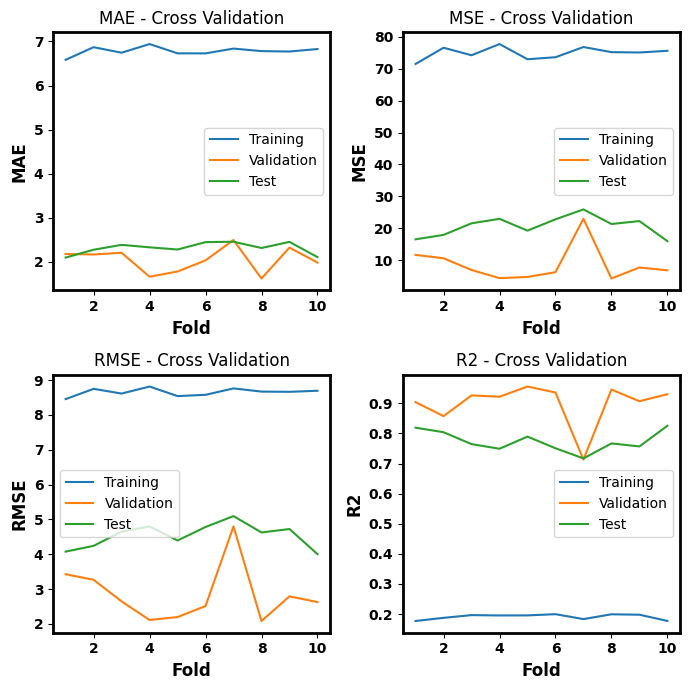

In [25]:
Plotters.plot_metricas_evaluacion(results)

In [26]:
y_pred_test_cn=svr_model.predicter_corrected_2(X_test= xgb_model.X_test, y_test=xgb_model.y_test)
y_pred_test_ad=svr_model.predicter_corrected_2(X_test= X_AD_scaled, y_test=y_AD)
y_pred_test_ftd=svr_model.predicter_corrected_2(X_test= X_FTD_scaled, y_test=y_FTD)
y_pred_test_mci=svr_model.predicter_corrected_2(X_test= X_MCI_scaled, y_test=y_MCI)
y_pred_test_pd=svr_model.predicter_corrected_2(X_test= X_PD_scaled, y_test=y_PD)


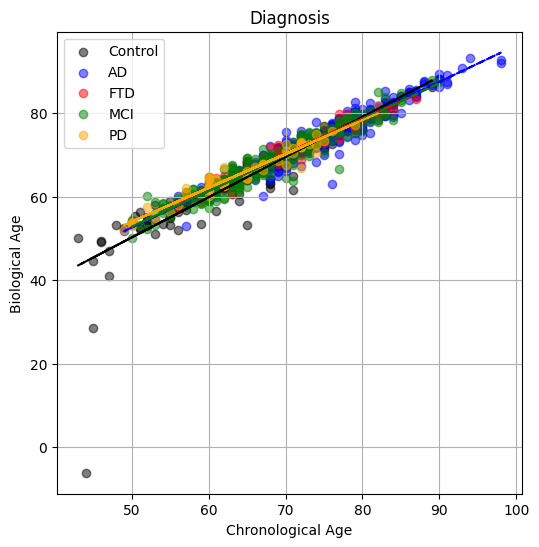

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Función para ajustar y graficar la recta de regresión
def plot_regression_line(x, y, color):
    # Ajuste de la recta de regresión
    slope, intercept = np.polyfit(x, y, 1)
    # Línea de regresión
    regression_line = slope * x + intercept
    # Graficar la línea de regresión
    plt.plot(x, regression_line, color=color, linestyle='--')

# Crear el gráfico
plt.figure(figsize=(6, 6))

# Graficar y ajustar la recta de Control
plt.scatter(svr_model.y_test, y_pred_test_cn, color='black', label='Control', alpha=0.5)
plot_regression_line(svr_model.y_test, y_pred, color='black')

# Graficar y ajustar la recta de AD
plt.scatter(y_AD, y_pred_test_ad, color='blue', label='AD', alpha=0.5)
plot_regression_line(y_AD, y_pred_test_ad, color='blue')

# Graficar y ajustar la recta de FTD
plt.scatter(y_FTD, y_pred_test_ftd, color='red', label='FTD', alpha=0.5)
plot_regression_line(y_FTD, y_pred_test_ftd, color='red')

# Graficar y ajustar la recta de MCI
plt.scatter(y_MCI, y_pred_test_mci, color='green', label='MCI', alpha=0.5)
plot_regression_line(y_MCI, y_pred_test_mci, color='green',)


# Graficar y ajustar la recta de PD
plt.scatter(y_PD, y_pred_test_pd, color='orange', label='PD', alpha=0.5)
plot_regression_line(y_PD, y_pred_test_pd, color='orange',)


# Añadir detalles
plt.xlabel('Chronological Age')
plt.ylabel('Biological Age')
plt.title('Diagnosis')
plt.legend()
#plt.xlim(30, 110)
#plt.ylim(30, 90)
plt.grid(True)

# Mostrar el gráfico
plt.show()


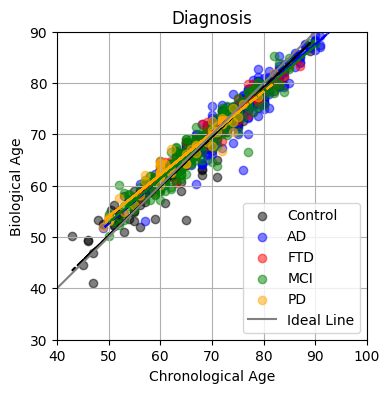

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Función para ajustar y graficar la recta de regresión
def plot_regression_line(x, y, color):
    # Ajuste de la recta de regresión
    slope, intercept = np.polyfit(x, y, 1)
    # Línea de regresión
    regression_line = slope * x + intercept
    # Graficar la línea de regresión
    plt.plot(x, regression_line, color=color, linestyle='--')

# Crear el gráfico
plt.figure(figsize=(4, 4))

# Graficar y ajustar la recta de Control
plt.scatter(svr_model.y_test, y_pred_test_cn, color='black', label='Control', alpha=0.5)
plot_regression_line(svr_model.y_test, y_pred, color='black')

# Graficar y ajustar la recta de AD
plt.scatter(y_AD, y_pred_test_ad, color='blue', label='AD', alpha=0.5)
plot_regression_line(y_AD, y_pred_test_ad, color='blue')

# Graficar y ajustar la recta de FTD
plt.scatter(y_FTD, y_pred_test_ftd, color='red', label='FTD', alpha=0.5)
plot_regression_line(y_FTD, y_pred_test_ftd, color='red')

# Graficar y ajustar la recta de MCI
plt.scatter(y_MCI, y_pred_test_mci, color='green', label='MCI', alpha=0.5)
plot_regression_line(y_MCI, y_pred_test_mci, color='green')

# Graficar y ajustar la recta de PD
plt.scatter(y_PD, y_pred_test_pd, color='orange', label='PD', alpha=0.5)
plot_regression_line(y_PD, y_pred_test_pd, color='orange')

# Graficar la línea de edad ideal
age_range = np.linspace(30, 110, 100)
plt.plot(age_range, age_range, color='gray', linestyle='-', label='Ideal Line')

# Añadir detalles
plt.xlabel('Chronological Age')
plt.ylabel('Biological Age')
plt.title('Diagnosis')
plt.legend()
plt.xlim(40, 100)
plt.ylim(30, 90)
plt.grid(True)

# Mostrar el gráfico
plt.show()


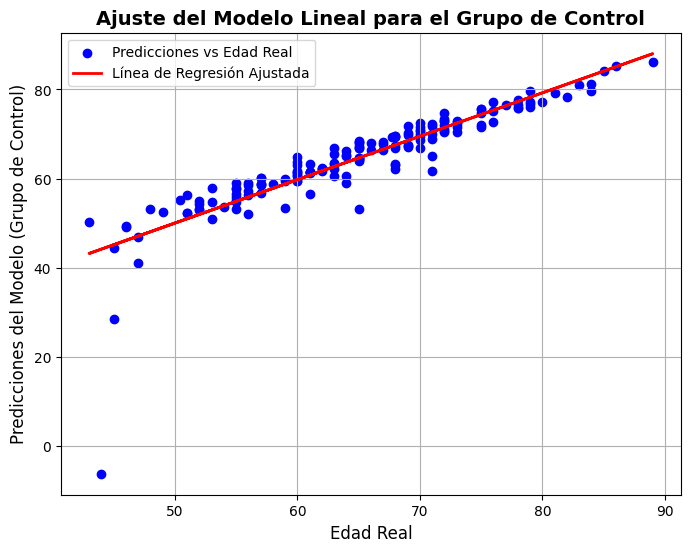

Pendiente (Coeficiente): 0.9738543367532978
Intercepto: 1.3382538795246504


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Convertir las Series a arrays de NumPy y ajustar el modelo lineal
y_test_array = svr_model.y_test.values.reshape(-1, 1)  # Convertir a array NumPy y reescalar
y_pred_test_cn_array = y_pred_test_cn.reshape(-1, 1)  # Convertir a array NumPy y reescalar

# Ajustar el modelo lineal al grupo de control
control_model = LinearRegression()
control_model.fit(y_test_array,y_pred_test_cn.reshape(-1, 1))

# Predicciones del modelo ajustado para el grupo de control
y_pred_control_fit = control_model.predict(y_test_array)

# Crear el gráfico de la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(svr_model.y_test, y_pred_test_cn, color='blue', label='Predicciones vs Edad Real')
plt.plot(svr_model.y_test, y_pred_control_fit, color='red', linewidth=2, label='Línea de Regresión Ajustada')

plt.title('Ajuste del Modelo Lineal para el Grupo de Control', fontsize=14, fontweight='bold')
plt.xlabel('Edad Real', fontsize=12)
plt.ylabel('Predicciones del Modelo (Grupo de Control)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Obtener la pendiente (coeficiente) y el intercepto
coef = control_model.coef_
intercept = control_model.intercept_

print(f'Pendiente (Coeficiente): {coef[0][0]}')
print(f'Intercepto: {intercept[0]}')


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Evaluar el error para el grupo AD
y_ad_pred_control = control_model.predict(y_AD.values.reshape(-1, 1))
error_ad =   -y_ad_pred_control.flatten() + y_pred_test_ad 
error_ad_abs = np.abs(y_pred_test_ad - y_ad_pred_control.flatten()  )
error_ad_0 =   -y_AD + y_pred_test_ad 
error_ad_abs_0 = np.abs(y_pred_test_ad - y_AD.values  )

# Evaluar el error para el grupo FTD
y_ftd_pred_control = control_model.predict(y_FTD.values.reshape(-1, 1))
error_ftd = -y_ftd_pred_control.flatten() + y_pred_test_ftd 
error_ftd_abs = np.abs(y_pred_test_ftd - y_ftd_pred_control.flatten() )
error_ftd_0 =  -y_FTD + y_pred_test_ftd 
error_ftd_abs_0 = np.abs(y_pred_test_ftd - y_FTD.values )


# Evaluar el error para el grupo MCI
y_mci_pred_control = control_model.predict(y_MCI.values.reshape(-1, 1))
error_mci =    -y_mci_pred_control.flatten() + y_pred_test_mci 
error_mci_abs = np.abs(y_pred_test_mci - y_mci_pred_control.flatten() )
error_mci_0 =  -y_MCI + y_pred_test_mci 
error_mci_abs_0 = np.abs(y_pred_test_mci - y_MCI.values )

# Evaluar el error para el grupo PD
y_pd_pred_control = control_model.predict(y_PD.values.reshape(-1, 1))
error_pd =   -y_pd_pred_control.flatten() + y_pred_test_pd 
error_pd_abs = np.abs(y_pred_test_pd - y_pd_pred_control.flatten() )
error_pd_0 =  -y_PD + y_pred_test_pd 
error_pd_abs_0 = np.abs(y_pred_test_pd - y_PD.values )

# Evaluar el error para el grupo Control
y_cn_pred_control = control_model.predict(svr_model.y_test.values.reshape(-1, 1))
error_cn =  -y_cn_pred_control.flatten() + y_pred_test_cn 
error_cn_abs = np.abs(y_pred_test_cn - y_cn_pred_control.flatten() )
error_cn_0 = -svr_model.y_test  + y_pred_test_cn 
error_cn_abs_0 = np.abs(y_pred_test_cn - svr_model.y_test)


C:\Users\felipe\AppData\Local\Temp\ipykernel_18084\705019583.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados)


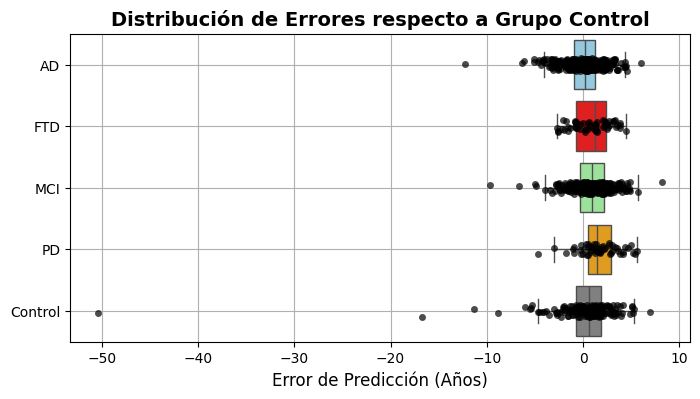

In [31]:

# Crear un DataFrame en formato largo para los errores
data = {
    'Error': np.concatenate([error_ad, error_ftd, error_mci, error_pd, error_cn]),
    'Grupo': ['AD'] * len(error_ad) + ['FTD'] * len(error_ftd) + ['MCI'] * len(error_mci) + ['PD'] * len(error_pd) + ['Control'] * len(error_cn)
}


df_errors = pd.DataFrame(data)

colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'MCI': 'lightgreen',
    'PD': 'orange',
    'Control': 'gray'
}


# Crear el diagrama de cajas y los puntos individuales en forma horizontal
plt.figure(figsize=(8, 4))
sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados)
sns.stripplot(y='Grupo', x='Error', data=df_errors, color='black', size=5,alpha=0.7, jitter=True)

plt.title('Distribución de Errores respecto a Grupo Control', fontsize=14, fontweight='bold')
plt.ylabel('', fontsize=12)
plt.xlabel('Error de Predicción (Años)', fontsize=12)
plt.grid(True)
plt.show()


C:\Users\felipe\AppData\Local\Temp\ipykernel_18084\99420997.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados)


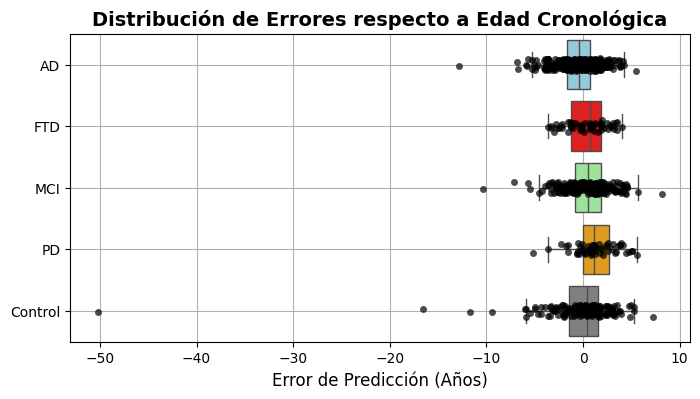

In [32]:
# Crear un DataFrame en formato largo para los errores
data = {
    'Error': np.concatenate([error_ad_0, error_ftd_0, error_mci_0, error_pd_0, error_cn_0]),
    'Grupo': ['AD'] * len(error_ad_0) + ['FTD'] * len(error_ftd_0) + ['MCI'] * len(error_mci_0) + ['PD'] * len(error_pd_0) + ['Control'] * len(error_cn_0)
}

df_errors = pd.DataFrame(data)

# Definir los colores para cada grupo
colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'MCI': 'lightgreen',
    'PD': 'orange',
    'Control': 'gray'
}

# Crear el diagrama de cajas y los puntos individuales en forma horizontal
plt.figure(figsize=(8, 4))
sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados)
sns.stripplot(y='Grupo', x='Error', data=df_errors, color='black', size=5, alpha=0.7, jitter=True)

plt.title('Distribución de Errores respecto a Edad Cronológica', fontsize=14, fontweight='bold')
plt.ylabel('', fontsize=12)
plt.xlabel('Error de Predicción (Años)', fontsize=12)
plt.grid(True)
plt.show()